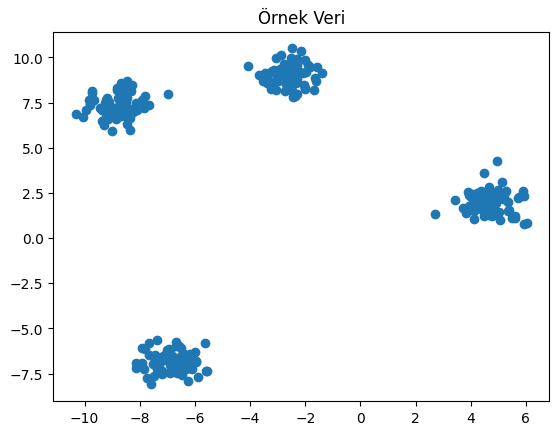

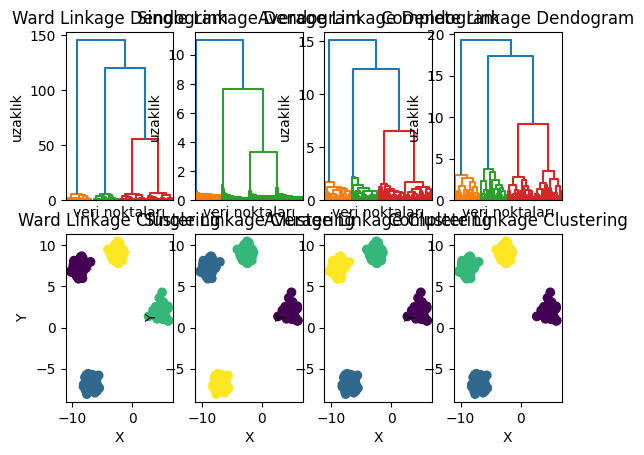

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title("Örnek Veri")

# ward -> kume ici varyanslari minimize ederek kumelemeye calisma
# single -> 2 kume icindeki birbirine en yakin 2 noktasi arasindaki mesafeyi olcut olarak alinmasi birbirinden ayrilmasi
# average -> 2 kume arasindaki tum noktalarin mesafelerinin ortalamasinin kullanilmasi
# complete -> 2 kume arasindaki en uzak iki nokta arasindaki mesafenin olculmesi
linkage_methods = ["ward", "single", "average", "complete"]

plt.figure()
for i, linkage_methods in enumerate(linkage_methods, 1):

    model = AgglomerativeClustering(n_clusters=4, linkage=linkage_methods)
    cluster_labels = model.fit_predict(X)

    plt.subplot(2, 4, i)
    plt.title(f"{linkage_methods.capitalize()} Linkage Dendogram")
    dendrogram(linkage(X, method=linkage_methods), no_labels=True)
    plt.xlabel("veri noktaları")
    plt.ylabel("uzaklık")

    plt.subplot(2, 4, i + 4)
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap="viridis")
    plt.title(f"{linkage_methods.capitalize()} Linkage Clustering")
    plt.xlabel("X")
    plt.ylabel("Y")
    